<a href="https://colab.research.google.com/github/aparnashenoy/ml/blob/master/paper3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [2]:
path = '/gdrive/My Drive/'

In [3]:
import numpy as np
import pandas as pd
from pandas import read_csv
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
data = pd.read_csv(path +'Copy of train.psv', sep='|')

In [5]:
# Load libraries

from numpy import arange
from numpy import set_printoptions
from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import Binarizer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

import warnings
warnings.filterwarnings('ignore')

In [6]:
# Statistical Summary
set_option('display.width', 100)
set_option('precision', 3)
description = data.describe()
print(description)

              HR      O2Sat        Temp  ...  HospAdmTime     ICULOS  SepsisLabel
count  1.059e+06  1.018e+06  394625.000  ...    1.167e+06  1.167e+06    1.167e+06
mean   8.471e+01  9.721e+01      36.994  ...   -5.331e+01  2.670e+01    1.921e-02
std    1.717e+01  2.928e+00       0.772  ...    1.498e+02  2.777e+01    1.373e-01
min    2.000e+01  2.000e+01      20.900  ...   -3.711e+03  1.000e+00    0.000e+00
25%    7.200e+01  9.600e+01      36.500  ...   -4.268e+01  1.100e+01    0.000e+00
50%    8.400e+01  9.800e+01      37.000  ...   -4.880e+00  2.100e+01    0.000e+00
75%    9.600e+01  9.950e+01      37.500  ...   -3.000e-02  3.400e+01    0.000e+00
max    2.800e+02  1.000e+02      50.000  ...    2.399e+01  3.360e+02    1.000e+00

[8 rows x 41 columns]


In [7]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
HR,1.059e+06,84.712,17.173,20.00,72.00,84.00,96.00,280.00
O2Sat,1.018e+06,97.212,2.928,20.00,96.00,98.00,99.50,100.00
Temp,3.946e+05,36.994,0.772,20.90,36.50,37.00,37.50,50.00
SBP,9.933e+05,122.800,22.664,20.00,106.00,120.00,137.00,300.00
MAP,1.030e+06,81.164,16.025,20.00,70.00,79.00,90.00,300.00
DBP,7.331e+05,62.805,13.716,20.00,53.00,61.00,70.50,300.00
Resp,1.010e+06,18.736,5.192,1.00,15.00,18.00,22.00,100.00
EtCO2,2.740e+04,33.234,8.215,10.00,28.50,33.50,38.00,100.00
BaseExcess,8.333e+04,-0.671,4.292,-32.00,-3.00,0.00,1.00,100.00
HCO3,6.441e+04,24.082,4.387,0.00,22.00,24.00,27.00,55.00


In [8]:
# Class Distribution
class_counts = data.groupby('SepsisLabel').size()
print(class_counts)

SepsisLabel
0    1144776
1      22426
dtype: int64


In [9]:
shape = data.shape
print(shape)

(1167202, 41)


In [10]:
types = data.dtypes
print(types)

HR                  float64
O2Sat               float64
Temp                float64
SBP                 float64
MAP                 float64
DBP                 float64
Resp                float64
EtCO2               float64
BaseExcess          float64
HCO3                float64
FiO2                float64
pH                  float64
PaCO2               float64
SaO2                float64
AST                 float64
BUN                 float64
Alkalinephos        float64
Calcium             float64
Chloride            float64
Creatinine          float64
Bilirubin_direct    float64
Glucose             float64
Lactate             float64
Magnesium           float64
Phosphate           float64
Potassium           float64
Bilirubin_total     float64
TroponinI           float64
Hct                 float64
Hgb                 float64
PTT                 float64
WBC                 float64
Fibrinogen          float64
Platelets           float64
Age                 float64
Gender              

In [11]:
# Pairwise Pearson correlations
correlations = data.corr(method='pearson')
print(correlations)

                     HR      O2Sat   Temp  ...  HospAdmTime  ICULOS  SepsisLabel
HR                1.000 -8.025e-02  0.256  ...       -0.053   0.037    4.722e-02
O2Sat            -0.080  1.000e+00 -0.032  ...       -0.005  -0.051   -7.890e-03
Temp              0.256 -3.188e-02  1.000  ...        0.017   0.094    4.532e-02
SBP              -0.028  2.908e-02  0.004  ...        0.035   0.074   -1.047e-02
MAP               0.087  3.152e-02 -0.051  ...        0.035   0.038   -1.501e-02
DBP               0.147  4.453e-03 -0.095  ...        0.037   0.019   -1.303e-02
Resp              0.232 -1.544e-01  0.128  ...       -0.033   0.109    4.715e-02
EtCO2             0.021 -6.018e-02  0.206  ...        0.022   0.083   -1.345e-02
BaseExcess       -0.092  3.250e-02  0.148  ...       -0.022   0.155    1.710e-02
HCO3             -0.093 -6.077e-02  0.078  ...       -0.021   0.118   -1.426e-02
FiO2              0.081 -1.597e-01 -0.191  ...        0.006  -0.102    2.300e-02
pH               -0.102  1.0

In [12]:
# Skew for each attribute
skew = data.skew()
print(skew)

HR                   0.419
O2Sat               -4.300
Temp                -0.384
SBP                  0.580
MAP                  1.096
DBP                  1.047
Resp                 0.906
EtCO2                0.508
BaseExcess          -0.002
HCO3                 0.150
FiO2                 2.817
pH                  -0.941
PaCO2                1.515
SaO2                -2.188
AST                  6.077
BUN                  2.512
Alkalinephos        10.120
Calcium             -1.990
Chloride            -0.148
Creatinine           4.765
Bilirubin_direct     3.823
Glucose              3.025
Lactate              3.602
Magnesium            1.994
Phosphate            1.712
Potassium            1.730
Bilirubin_total      5.086
TroponinI            6.678
Hct                  0.499
Hgb                  0.465
PTT                  3.215
WBC                 12.697
Fibrinogen           1.618
Platelets            1.850
Age                 -0.502
Gender              -0.267
Unit1               -0.008
U

In [13]:
plt.rcParams["figure.figsize"] = (20, 15)

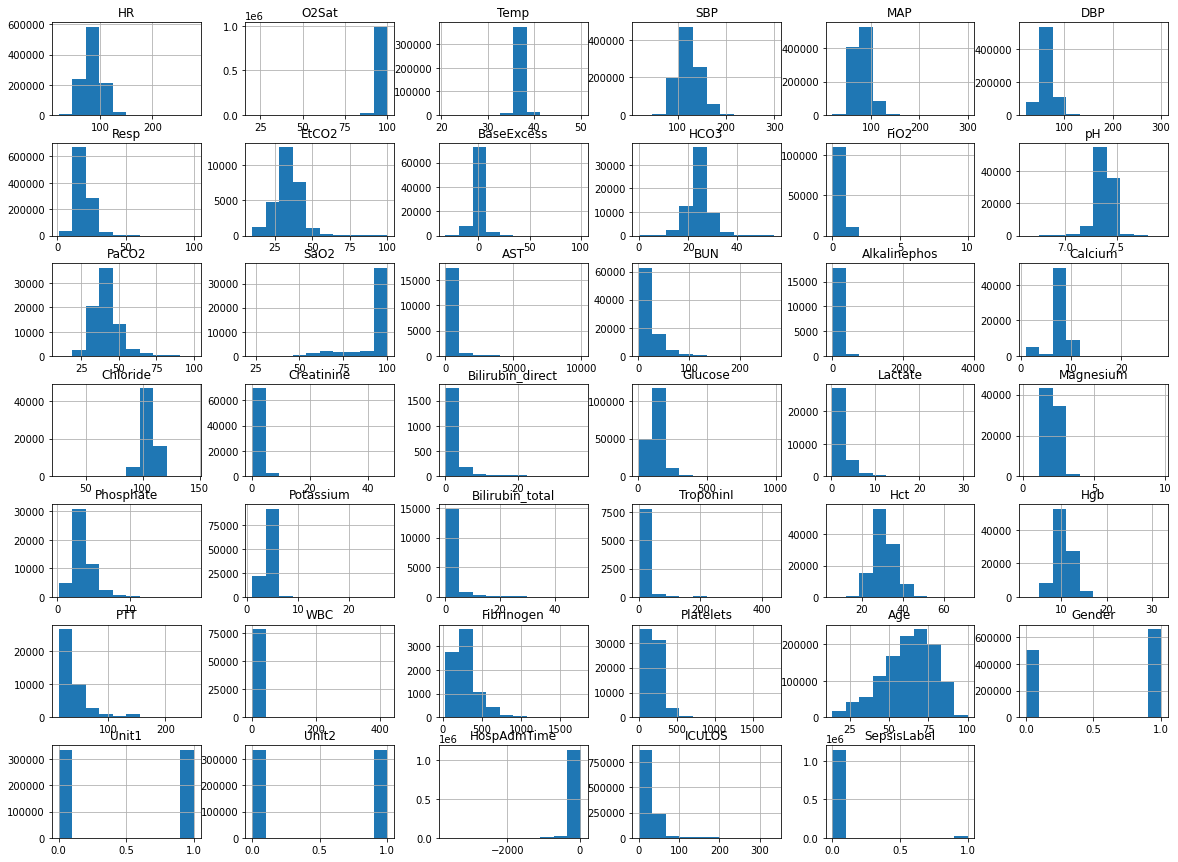

In [14]:
# Univariate Histograms
data.hist()

plt.show()

In [15]:
from imblearn.over_sampling import SMOTE

smote = SMOTE( random_state= 0 )

In [16]:
data=data.sample(n=100000,random_state=1,replace=True)

In [17]:
Xcol = data.drop(columns = ["SepsisLabel"])
ycol = data["SepsisLabel"]
X=np.array(Xcol)
y=np.array(ycol)
X.shape,y.shape

((100000, 40), (100000,))

In [18]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan,strategy='median')
X = imputer.fit_transform(X)

In [19]:
X_rs, y_rs = smote.fit_resample(X, y)

In [20]:
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX = scaler.fit_transform(X_rs)
# summarize transformed data
set_printoptions(precision=3)
print(rescaledX[0:5,:])

[[0.186 1.    0.683 0.357 0.232 0.146 0.264 0.267 0.519 0.39  0.7   0.584
  0.326 0.958 0.004 0.154 0.052 0.273 0.529 0.014 0.043 0.378 0.06  0.148
  0.256 0.173 0.014 0.002 0.34  0.372 0.036 0.124 0.223 0.133 0.697 1.
  1.    0.    0.994 0.003]
 [0.281 1.    0.683 0.575 0.351 0.146 0.178 0.267 0.519 0.463 0.4   0.584
  0.326 0.958 0.004 0.06  0.052 0.281 0.485 0.019 0.043 0.155 0.06  0.148
  0.217 0.281 0.014 0.002 0.373 0.419 0.066 0.082 0.223 0.134 0.861 1.
  1.    0.    0.994 0.045]
 [0.467 0.95  0.683 0.289 0.204 0.146 0.341 0.267 0.519 0.463 0.5   0.584
  0.326 0.958 0.004 0.06  0.052 0.281 0.485 0.019 0.043 0.155 0.06  0.148
  0.217 0.281 0.014 0.002 0.373 0.419 0.066 0.082 0.223 0.134 0.845 1.
  1.    0.    0.994 0.039]
 [0.251 1.    0.683 0.425 0.275 0.146 0.279 0.267 0.519 0.463 0.5   0.584
  0.326 0.958 0.004 0.06  0.052 0.281 0.485 0.019 0.043 0.155 0.06  0.148
  0.217 0.281 0.014 0.002 0.373 0.419 0.066 0.082 0.223 0.134 0.779 1.
  1.    0.    0.994 0.066]
 [0.171 0.95  0.

In [21]:
# Standardize data (0 mean, 1 stdev)
scaler = StandardScaler().fit(X_rs)
rescaledX = scaler.transform(X_rs)
# summarize transformed data
set_printoptions(precision=3)
print(rescaledX[0:5,:])

[[-1.803e+00  1.081e+00 -5.949e-02  3.454e-01  3.203e-01 -7.759e-02
  -2.985e-01  4.844e-03  5.650e-02 -2.945e+00  2.912e+00  2.447e-02
  -4.504e-02  7.876e-02 -4.491e-02  3.661e+00 -4.307e-02 -3.152e-01
   2.304e+00 -5.114e-01 -3.045e-02  8.412e+00 -7.427e-02 -4.958e-02
   1.578e+00 -4.911e+00 -4.643e-02 -2.386e-02 -1.333e+00 -1.744e+00
  -1.593e+00  3.260e+00 -3.992e-02 -6.140e-02  7.794e-01  9.186e-01
   5.687e-01 -5.687e-01  3.757e-01 -8.235e-01]
 [-6.698e-01  1.081e+00 -5.949e-02  3.129e+00  2.615e+00 -7.759e-02
  -1.439e+00  4.844e-03  5.650e-02  6.157e-03 -1.578e+00  2.447e-02
  -4.504e-02  7.876e-02 -4.491e-02 -1.225e-01 -4.307e-02  7.262e-02
   2.102e-02 -1.008e-01 -3.045e-02 -9.619e-02 -7.427e-02 -4.958e-02
  -3.888e-02 -4.334e-02 -4.643e-02 -2.386e-02 -3.932e-03  7.689e-03
  -7.119e-02 -6.607e-02 -3.992e-02 -2.353e-02  1.663e+00  9.186e-01
   5.687e-01 -5.687e-01  3.754e-01 -5.151e-01]
 [ 1.537e+00 -4.836e-01 -5.949e-02 -5.184e-01 -2.305e-01 -7.759e-02
   7.380e-01  4.844e-0

In [22]:
# Normalize data (length of 1)
scaler = Normalizer().fit(X_rs)
normalizedX = scaler.transform(X_rs)
# summarize transformed data
set_printoptions(precision=3)
print(normalizedX[0:5,:])

[[ 1.105e-01  1.938e-01  7.170e-02  2.500e-01  1.647e-01  1.182e-01
   3.488e-02  6.492e-02  0.000e+00  4.069e-02  1.356e-03  1.430e-02
   7.751e-02  1.880e-01  8.333e-02  8.139e-02  1.424e-01  1.570e-02
   2.112e-01  1.356e-03  1.744e-03  5.659e-01  3.653e-03  3.876e-03
   7.364e-03  6.007e-03  1.550e-03  7.170e-04  5.484e-02  1.841e-02
   4.922e-02  3.042e-02  4.932e-01  3.508e-01  1.444e-01  1.938e-03
   1.938e-03  0.000e+00 -1.938e-05  3.876e-03]
 [ 1.600e-01  2.105e-01  7.789e-02  3.937e-01  2.491e-01  1.284e-01
   2.631e-02  7.052e-02  0.000e+00  5.052e-02  8.420e-04  1.554e-02
   8.420e-02  2.042e-01  9.052e-02  3.579e-02  1.547e-01  1.747e-02
   2.231e-01  1.895e-03  1.895e-03  2.652e-01  3.968e-03  4.210e-03
   6.947e-03  8.631e-03  1.684e-03  7.789e-04  6.357e-02  2.168e-02
   6.842e-02  2.210e-02  5.357e-01  3.831e-01  1.860e-01  2.105e-03
   2.105e-03  0.000e+00 -1.053e-04  3.368e-02]
 [ 2.519e-01  2.140e-01  8.249e-02  2.475e-01  1.717e-01  1.360e-01
   5.127e-02  7.468e-0

In [23]:
# Feature Extraction with RFE
# feature extraction
model = LogisticRegression()
rfe = RFE(model, 25)
fit = rfe.fit(X_rs, y_rs)
print(("Num Features: %d") % fit.n_features_)
print(("Selected Features: %s") % fit.support_)
print(("Feature Ranking: %s") % fit.ranking_)

Num Features: 25
Selected Features: [ True False  True False  True False  True  True  True  True  True  True
 False False False  True False  True  True False False False  True  True
  True  True  True  True  True  True False  True False False False  True
  True  True False  True]
Feature Ranking: [ 1  6  1  7  1  8  1  1  1  1  1  1  3  2 16  1 12  1  1 14 15  9  1  1
  1  1  1  1  1  1 13  1  4  5 11  1  1  1 10  1]


In [24]:
# Feature Extraction with PCA
# feature extraction
pca = PCA(n_components=25)
fit = pca.fit(X_rs)
# summarize components
print(("Explained Variance: %s") % fit.explained_variance_ratio_)
print(fit.components_)

Explained Variance: [7.017e-01 1.862e-01 4.693e-02 1.578e-02 1.415e-02 8.595e-03 7.403e-03
 6.327e-03 4.766e-03 3.007e-03 1.921e-03 9.462e-04 6.386e-04 4.854e-04
 4.729e-04 1.694e-04 1.398e-04 1.063e-04 5.319e-05 4.972e-05 4.427e-05
 4.088e-05 3.600e-05 3.149e-05 1.588e-05]
[[ 5.520e-03  2.465e-04 -7.091e-05 -8.560e-03 -5.412e-03 -2.263e-03
   1.094e-03  7.746e-05 -7.739e-05 -3.539e-05 -5.758e-06  1.988e-06
  -3.408e-04 -7.574e-06 -3.073e-03  2.047e-04  6.595e-04 -4.818e-05
  -9.370e-05 -1.022e-05  1.229e-05 -1.166e-03 -1.886e-05 -2.150e-06
  -7.547e-06  1.614e-05  4.396e-05 -2.967e-05 -2.765e-04 -1.014e-04
  -5.934e-05  9.227e-05 -2.149e-04 -3.612e-03 -2.609e-04 -3.927e-05
  -5.059e-05  5.059e-05 -9.999e-01  2.568e-03]
 [ 3.770e-03 -2.268e-04  5.794e-05 -2.160e-03 -1.625e-03 -1.048e-04
  -4.483e-04 -1.246e-04  7.660e-05 -6.855e-04  3.917e-05  1.460e-06
   2.708e-04 -8.247e-05  9.994e-01  9.903e-03  2.406e-02 -2.093e-05
  -9.579e-04  4.840e-04  5.399e-04 -1.682e-03  8.394e-04  4.719e-0

In [25]:
# Feature Importance with Extra Trees Classifier
# feature extraction
model = ExtraTreesClassifier()
model.fit(X_rs, y_rs)
print(model.feature_importances_)

[0.05  0.041 0.026 0.04  0.037 0.035 0.047 0.011 0.009 0.003 0.025 0.011
 0.009 0.005 0.001 0.004 0.001 0.003 0.003 0.003 0.    0.009 0.007 0.003
 0.002 0.006 0.001 0.001 0.006 0.004 0.003 0.003 0.001 0.003 0.051 0.177
 0.087 0.086 0.052 0.132]


In [26]:
# Evaluate using a train and a test set
test_size = 0.25
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X_rs, y_rs, test_size=test_size, random_state=seed)
model = LogisticRegression()
model.fit(X_train, Y_train)
result = model.score(X_test, Y_test)
print(("Accuracy: %.3f%%") % (result*100.0))

Accuracy: 66.026%


In [27]:
# Evaluate using Cross Validation
num_folds = 10
seed = 7
kfold = KFold(n_splits=num_folds, random_state=seed)
model = LogisticRegression()
results = cross_val_score(model, X_rs, y_rs, cv=kfold)
print(("Accuracy: %.3f%% (%.3f%%)") % (results.mean()*100.0, results.std()*100.0))

Accuracy: 55.691% (7.047%)


In [28]:
# Evaluate using Shuffle Split Cross Validation
n_splits = 10
test_size = 0.25
seed = 7
kfold = ShuffleSplit(n_splits=n_splits, test_size=test_size, random_state=seed)
model = LogisticRegression()
results = cross_val_score(model, X_rs, y_rs, cv=kfold)
print(("Accuracy: %.3f%% (%.3f%%)") % (results.mean()*100.0, results.std()*100.0))

Accuracy: 66.121% (0.171%)


In [29]:
# Cross Validation Classification Accuracy
kfold = KFold(n_splits=10, random_state=7)
model = LogisticRegression()
scoring = 'accuracy'
results = cross_val_score(model, X_rs, y_rs, cv=kfold, scoring=scoring)
print(("Accuracy: %.3f (%.3f)") % (results.mean(), results.std()))

Accuracy: 0.557 (0.070)


In [30]:
# Logistic Regression Classification
num_folds = 10
kfold = KFold(n_splits=10, random_state=7)
model = LogisticRegression()
results = cross_val_score(model, X_rs, y_rs, cv=kfold)
print(results.mean())

0.5569085727391649


In [31]:
# LDA Classification
num_folds = 10
kfold = KFold(n_splits=10, random_state=7)
model = LinearDiscriminantAnalysis()
results = cross_val_score(model, X_rs, y_rs, cv=kfold)
print(results.mean())

0.5521311781122227


LR: 0.556909 (0.070473)
LDA: 0.552131 (0.052059)
KNN: 0.932388 (0.062381)
CART: 0.970120 (0.016752)
NB: 0.596188 (0.233190)


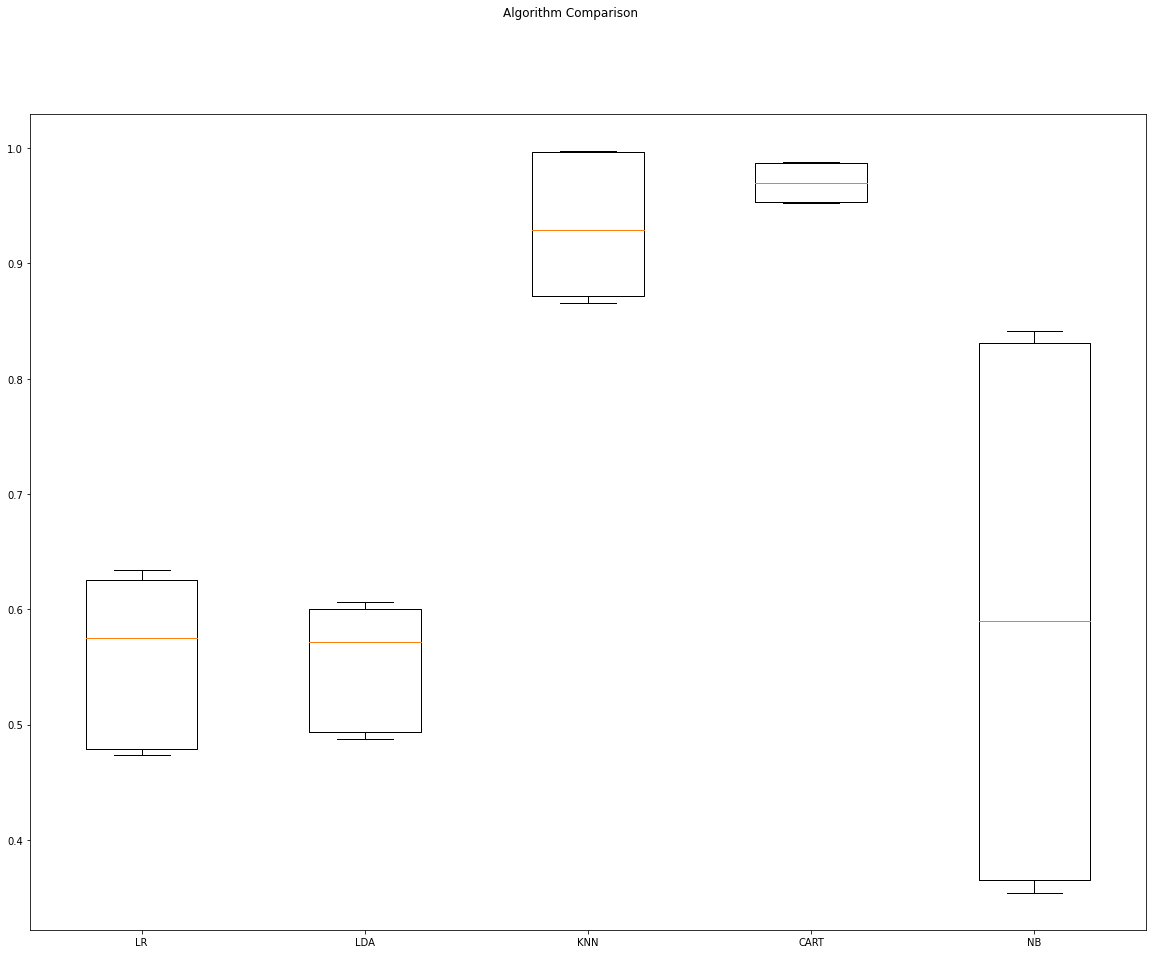

In [32]:
# Compare Algorithms
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = KFold(n_splits=10, random_state=7)
    cv_results = cross_val_score(model, X_rs, y_rs, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [33]:
# Rescale data (between 0 and 1)
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX = scaler.fit_transform(X_rs)

# Compare Algorithms
# prepare models
models = []
models.append(('ScaledLR', LogisticRegression()))
models.append(('ScaledLDA', LinearDiscriminantAnalysis()))
models.append(('ScaledKNN', KNeighborsClassifier()))
models.append(('ScaledCART', DecisionTreeClassifier()))
models.append(('ScaledNB', GaussianNB()))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = KFold(n_splits=10, random_state=7)
    cv_results = cross_val_score(model, rescaledX, y_rs, cv=kfold, scoring=scoring) # note that we have replaced X with rescaledX
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: 0.568795 (0.046320)
ScaledLDA: 0.552131 (0.052059)
ScaledKNN: 0.953722 (0.039809)
ScaledCART: 0.969080 (0.016765)
ScaledNB: 0.596320 (0.232476)


In [34]:
# Standardize data (0 mean, 1 stdev)
scaler = StandardScaler().fit(X_rs)
rescaledX = scaler.transform(X_rs)

# Compare Algorithms
# prepare models
models = []
models.append(('StandardizedLR', LogisticRegression()))
models.append(('StandardizedLDA', LinearDiscriminantAnalysis()))
models.append(('StandardizedKNN', KNeighborsClassifier()))
models.append(('StandardizedCART', DecisionTreeClassifier()))
models.append(('StandardizedNB', GaussianNB()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = KFold(n_splits=10, random_state=7)
    cv_results = cross_val_score(model, rescaledX, y_rs, cv=kfold, scoring=scoring) # note that we have replaced X with rescaledX
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

StandardizedLR: 0.569646 (0.046393)
StandardizedLDA: 0.552131 (0.052059)
StandardizedKNN: 0.943045 (0.051401)
StandardizedCART: 0.969656 (0.017400)
StandardizedNB: 0.596320 (0.232476)


In [35]:
# Normalize data (length of 1)
scaler = Normalizer().fit(X_rs)
normalizedX = scaler.transform(X_rs)

# Compare Algorithms
# prepare models
models = []
models.append(('NormalizedLR', LogisticRegression()))
models.append(('NormalizedLDA', LinearDiscriminantAnalysis()))
models.append(('NormalizedKNN', KNeighborsClassifier()))
models.append(('NormalizedCART', DecisionTreeClassifier()))
models.append(('NormalizedNB', GaussianNB()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = KFold(n_splits=10, random_state=7)
    cv_results = cross_val_score(model, normalizedX, y_rs, cv=kfold, scoring=scoring) # note that we have replaced X with normalizedX
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

NormalizedLR: 0.551310 (0.064286)
NormalizedLDA: 0.562702 (0.045396)
NormalizedKNN: 0.932424 (0.062539)
NormalizedCART: 0.962655 (0.015047)
NormalizedNB: 0.585265 (0.259739)


In [36]:
# Create a pipeline that standardizes the data then creates a model
# create pipeline
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('lda', LinearDiscriminantAnalysis()))
model = Pipeline(estimators)
# evaluate pipeline
kfold = KFold(n_splits=10, random_state=7)
results = cross_val_score(model, X_rs, y_rs, cv=kfold)
print(results.mean())

0.5521311781122227


In [37]:
# Create a pipeline that extracts features from the data then creates a model
# create feature union
from sklearn.pipeline import FeatureUnion
features = []
features.append(('pca', PCA(n_components=25)))
features.append(('select_best', SelectKBest(k=20)))
feature_union = FeatureUnion(features)
# create pipeline
estimators = []
estimators.append(('feature_union', feature_union))
estimators.append(('logistic', LogisticRegression()))
model = Pipeline(estimators)
# evaluate pipeline
kfold = KFold(n_splits=10, random_state=7)
results = cross_val_score(model, X_rs, y_rs, cv=kfold)
print(results.mean())

0.5545630811658779


In [38]:
# Bagged Decision Trees for Classification
from sklearn.ensemble import BaggingClassifier
seed = 7
kfold = KFold(n_splits=10, random_state=seed)
cart = DecisionTreeClassifier()
num_trees = 100
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)
results = cross_val_score(model, X_rs, y_rs, cv=kfold)
print(results.mean())

0.9880786313686997


In [39]:
# Random Forest Classification
from sklearn.ensemble import RandomForestClassifier
num_trees = 100
max_features = 3
kfold = KFold(n_splits=10, random_state=7)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model, X_rs, y_rs, cv=kfold)
print(results.mean())

0.992958340560117


In [40]:
# Extra Trees Classification
from sklearn.ensemble import ExtraTreesClassifier
num_trees = 100
max_features = 7
kfold = KFold(n_splits=10, random_state=7)
model = ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model, X_rs, y_rs, cv=kfold)
print(results.mean())

0.9967009512875726


In [41]:
# AdaBoost Classification
from sklearn.ensemble import AdaBoostClassifier
num_trees = 30
seed=7
kfold = KFold(n_splits=10, random_state=seed)
model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
results = cross_val_score(model, X_rs, y_rs, cv=kfold)
print(results.mean())

0.8417713160581718


In [42]:
# Stochastic Gradient Boosting Classification
from sklearn.ensemble import GradientBoostingClassifier
seed = 7
num_trees = 100
kfold = KFold(n_splits=10, random_state=seed)
model = GradientBoostingClassifier(n_estimators=num_trees, random_state=seed)
results = cross_val_score(model, X_rs, y_rs, cv=kfold)
print(results.mean())

0.91312230407429


In [43]:
# Voting Ensemble for Classification
from sklearn.ensemble import VotingClassifier
kfold = KFold(n_splits=10, random_state=7)
# create the sub models
estimators = []
model1 = LogisticRegression()
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
model3 = KNeighborsClassifier()
estimators.append(('knn', model3))
# create the ensemble model
ensemble = VotingClassifier(estimators)
results = cross_val_score(ensemble, X_rs, y_rs, cv=kfold)
print(results.mean())

0.9489748923725341


In [45]:
# Cross Validation Classification Report
test_size = 0.25
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X_rs, y_rs, test_size=test_size, random_state=seed)
model = GradientBoostingClassifier(n_estimators=num_trees, random_state=seed)
model.fit(X_train, Y_train)
predicted = model.predict(X_test)
report = classification_report(Y_test, predicted)
print(report)

              precision    recall  f1-score   support

           0       0.89      0.96      0.93     24419
           1       0.96      0.89      0.92     24610

    accuracy                           0.93     49029
   macro avg       0.93      0.93      0.93     49029
weighted avg       0.93      0.93      0.93     49029



In [46]:
gbc_probs = model.predict_proba(X_test)

In [47]:
gbc_probs = gbc_probs[:, 1]

In [48]:
from sklearn.metrics import roc_auc_score

# calculate scores
gbc_auc = roc_auc_score(Y_test, gbc_probs)


print('Gradient Boosting Classifier with 100  trees: ROC AUC= {} %'.format(round(gbc_auc, 3)*100))

Gradient Boosting Classifier with 100  trees: ROC AUC= 97.89999999999999 %


In [49]:
from sklearn.metrics import roc_curve
#fpr --> False Positive Rate
#tpr --> True Positive Rate
gbc_fpr, gbc_tpr, gbc_thres = roc_curve(Y_test, gbc_probs)

In [52]:
# Cross Validation Classification Report
test_size = 0.25
seed = 7
num_trees=30
X_train, X_test, Y_train, Y_test = train_test_split(X_rs, y_rs, test_size=test_size, random_state=seed)
model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
model.fit(X_train, Y_train)
predicted = model.predict(X_test)
report = classification_report(Y_test, predicted)
print(report)

              precision    recall  f1-score   support

           0       0.83      0.92      0.87     24419
           1       0.91      0.82      0.86     24610

    accuracy                           0.87     49029
   macro avg       0.87      0.87      0.87     49029
weighted avg       0.87      0.87      0.87     49029



In [53]:
ada_probs=model.predict_proba(X_test)
ada_probs=ada_probs[:,1]

In [54]:
ada_auc = roc_auc_score(Y_test, ada_probs)


print('ADABoost Classifier with 30 trees: ROC AUC= {} %'.format(round(ada_auc, 3)*100))

ADABoost Classifier with 30 trees: ROC AUC= 93.30000000000001 %


In [55]:
from sklearn.metrics import roc_curve
#fpr --> False Positive Rate
#tpr --> True Positive Rate
ada_fpr, ada_tpr, ada_thres = roc_curve(Y_test, ada_probs)

In [59]:
# Cross Validation Classification Report
test_size = 0.25
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X_rs, y_rs, test_size=test_size, random_state=seed)
ensemble = VotingClassifier(estimators, voting='soft')
ensemble.fit(X_train, Y_train)
predicted = ensemble.predict(X_test)
report = classification_report(Y_test, predicted)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.96      0.97     24419
           1       0.96      0.99      0.97     24610

    accuracy                           0.97     49029
   macro avg       0.97      0.97      0.97     49029
weighted avg       0.97      0.97      0.97     49029



In [60]:
ensemble_probs=ensemble.predict_proba(X_test)
ensemble_probs=ensemble_probs[:,1]

In [61]:
ensemble_auc = roc_auc_score(Y_test, ensemble_probs)


print('Voting Classifier with LR, CART, KNN: ROC AUC= {} %'.format(round(ensemble_auc, 3)*100))

Voting Classifier with LR, CART, KNN: ROC AUC= 99.6 %


In [62]:
ensemble_fpr, ensemble_tpr, ensemble_thres = roc_curve(Y_test, ensemble_probs)

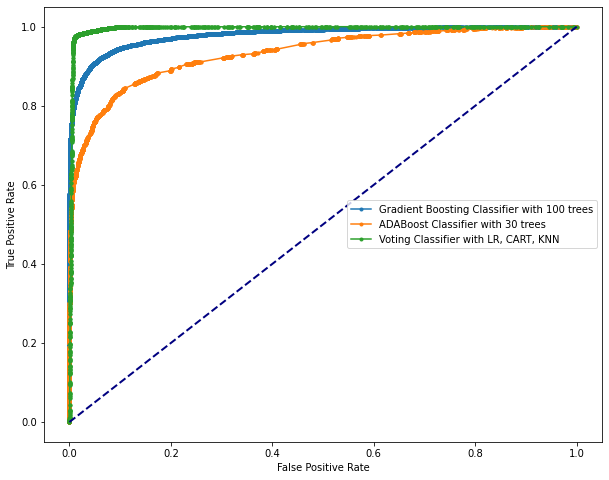

In [63]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(gbc_fpr, gbc_tpr, marker='.', label='Gradient Boosting Classifier with 100 trees')
ax.plot(ada_fpr, ada_tpr, marker='.', label='ADABoost Classifier with 30 trees')
ax.plot(ensemble_fpr, ensemble_tpr, marker='.', label= 'Voting Classifier with LR, CART, KNN' )
lw = 2
ax.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend(loc=5)
# show the plot
plt.show()